<a href="https://colab.research.google.com/github/AkshataKishore/Telecom_Churn_Prediction/blob/main/Telecom_Churn_Prediction_using_DtreeViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Churn Prediction 

In [19]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"
%cd /content/drive/My Drive/

In [ ]:
!pip install dtreeviz

## importing libraries 

In [ ]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [31]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import xgboost as xgb
from xgboost import plot_importance, plot_tree, plotting

from dtreeviz import trees 

import graphviz
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

import pandas as pd
import numpy as np
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.xgb_decision_tree import ShadowXGBDTree

In [32]:

pd.options.display.max_rows = 999

In [34]:
import pandas as pd
df = pd.read_csv('churn.csv')

In [36]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [39]:

df.drop('customerID', axis=1, inplace=True)
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'No', 1:'Yes'})
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})

In [40]:
# 'TotalCharges' is supposed to be  numerical, but it's an onject
# We will convert it into numerical data type

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Checking its datatype
df['TotalCharges'].dtypes

dtype('float64')

In [41]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Text(0.5, 1.0, 'Variables with missing values')

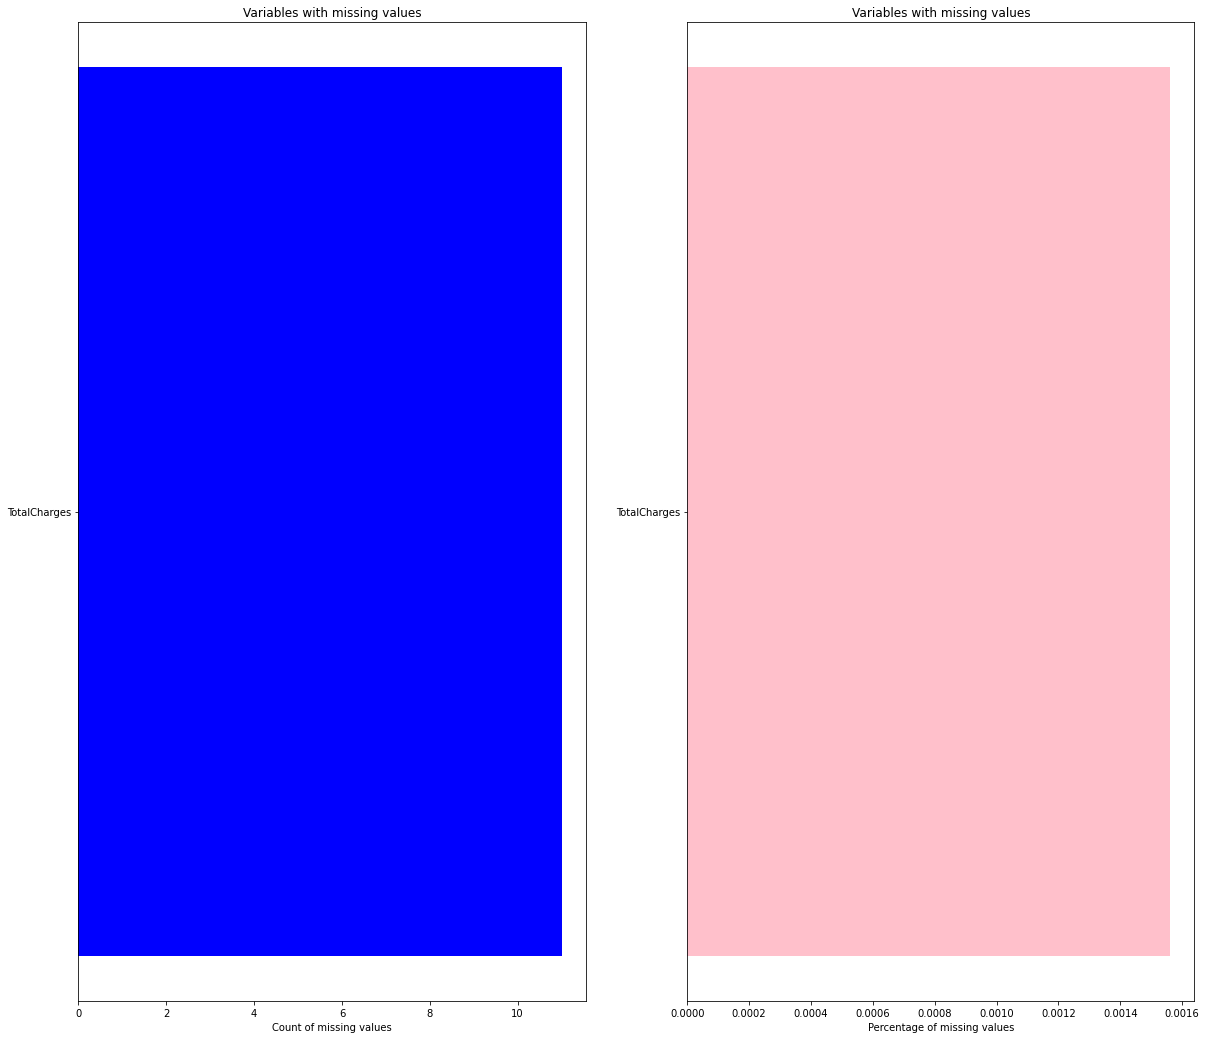

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# To hold variable names
labels = [] 

# To hold the count of missing values for each variable 
valuecount = [] 

# To hold the percentage of missing values for each variable
percentcount = [] 

columns_with_missing_values = df.columns[df.isnull().any()]
df[columns_with_missing_values].isnull().sum()
for col in columns_with_missing_values:
    labels.append(col)
    valuecount.append(df[col].isnull().sum())
    # housepricesdata.shape[0] will give the total row count
    percentcount.append(df[col].isnull().sum()/df.shape[0])

ind = np.arange(len(labels))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,18))

rects = ax1.barh(ind, np.array(valuecount), color='blue')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='horizontal')
ax1.set_xlabel("Count of missing values")
ax1.set_title("Variables with missing values")

rects = ax2.barh(ind, np.array(percentcount), color='pink')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel("Percentage of missing values")
ax2.set_title("Variables with missing values")

In [51]:
df_churn = df.dropna()
df_churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [47]:
!pip install heatmapz

In [48]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

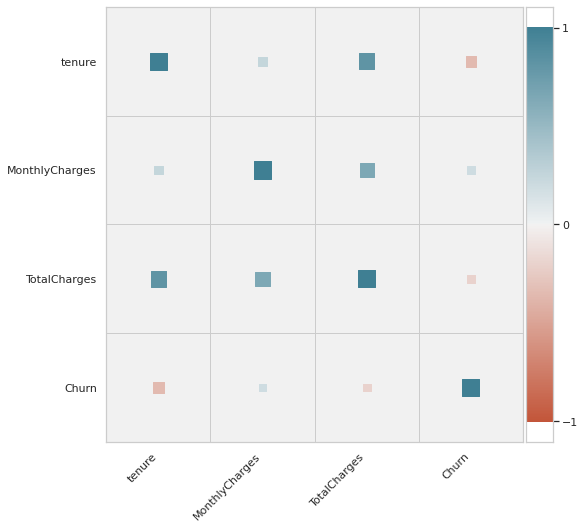

In [115]:
plt.figure(figsize=(8, 8))
corrplot(df.corr(), size_scale=300);

In [53]:
! pip install  altair

In [61]:
df_churn.drop('TotalCharges', axis=1, inplace=True)

# Checking whether 'TotalCharges' has been removed
df_churn.head()


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1


In [63]:
import seaborn as sns
# Set Style
sns.set(style = "whitegrid")
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = 'colab'
colors = ['rgb(0, 0, 100)']

fig = ff.create_distplot(hist_data = [df_churn["tenure"].values], group_labels = ['churn'], 
                         colors = colors, bin_size=2)

fig.update_layout(title_text='Distribution of tenure')

fig.show()

In [64]:
import seaborn as sns
# Set Style
sns.set(style = "whitegrid")
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = 'colab'
colors = ['rgb(0, 0, 100)']

fig = ff.create_distplot(hist_data = [df_churn["MonthlyCharges"].values], group_labels = ['churn'], 
                         colors = colors, bin_size=2)

fig.update_layout(title_text='Distribution of MonthlyCharges')

fig.show()

In [71]:
#!pip install plotly 
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'
fig = px.box(df_churn, x = 'Churn', y = 'tenure', points = "all", hover_name = 'Churn', 
             color = 'Churn', notched=True)

fig.update_layout(title_text="Distribution of tenure, churn - churn: 1, churn: 0")

fig.show()

In [72]:
fig = px.box(df_churn, x = 'Churn', y = 'MonthlyCharges', points = "all", hover_name = 'Churn', 
             color = 'Churn', notched=True)

fig.update_layout(title_text="Distribution of MonthlyCharges, churn - churn: 1, churn: 0")

fig.show()

In [76]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'
fig = px.box(df_churn, x = 'PhoneService', y = 'MonthlyCharges', points = "all", hover_name = 'Churn', 
             color = 'Churn', notched=True)

fig.update_layout(title_text="Distribution of PhoneServices , RETURN - Return: 1, Return: 0")

fig.show()

In [77]:
df_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

In [78]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'
fig = px.box(df_churn, x = 'PaymentMethod', y = 'MonthlyCharges', points = "all", hover_name = 'Churn', 
             color = 'Churn', notched=True)

fig.update_layout(title_text="Distribution of PhoneServices , RETURN - churn: 1, churn: 0")

fig.show()

In [89]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'
fig = px.box(df_churn, x = 'Contract', y = 'MonthlyCharges', points = "all", hover_name = 'Churn', 
             color = 'Churn', notched=True)

fig.update_layout(title_text="Distribution of contract , RETURN - churn: 1, churn: 0")

fig.show()

In [79]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'
fig = px.box(df_churn, x = 'gender', y = 'MonthlyCharges', points = "all", hover_name = 'Churn', 
             color = 'Churn', notched=True)

fig.update_layout(title_text="Distribution of gender , RETURN - churn: 1, churn: 0")

fig.show()

In [73]:
Contd_Data_Columns = ['tenure', 'MonthlyCharges']
Continuous_Data = pd.DataFrame(df_churn[Contd_Data_Columns])
Continuous_Data 
for col in Continuous_Data.select_dtypes(include=np.number):
    Continuous_Data[col] = Continuous_Data[col].fillna(Continuous_Data[col].median())
Continuous_Data .isnull().values.any()

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1adf90bef0>,
      dtype=object)

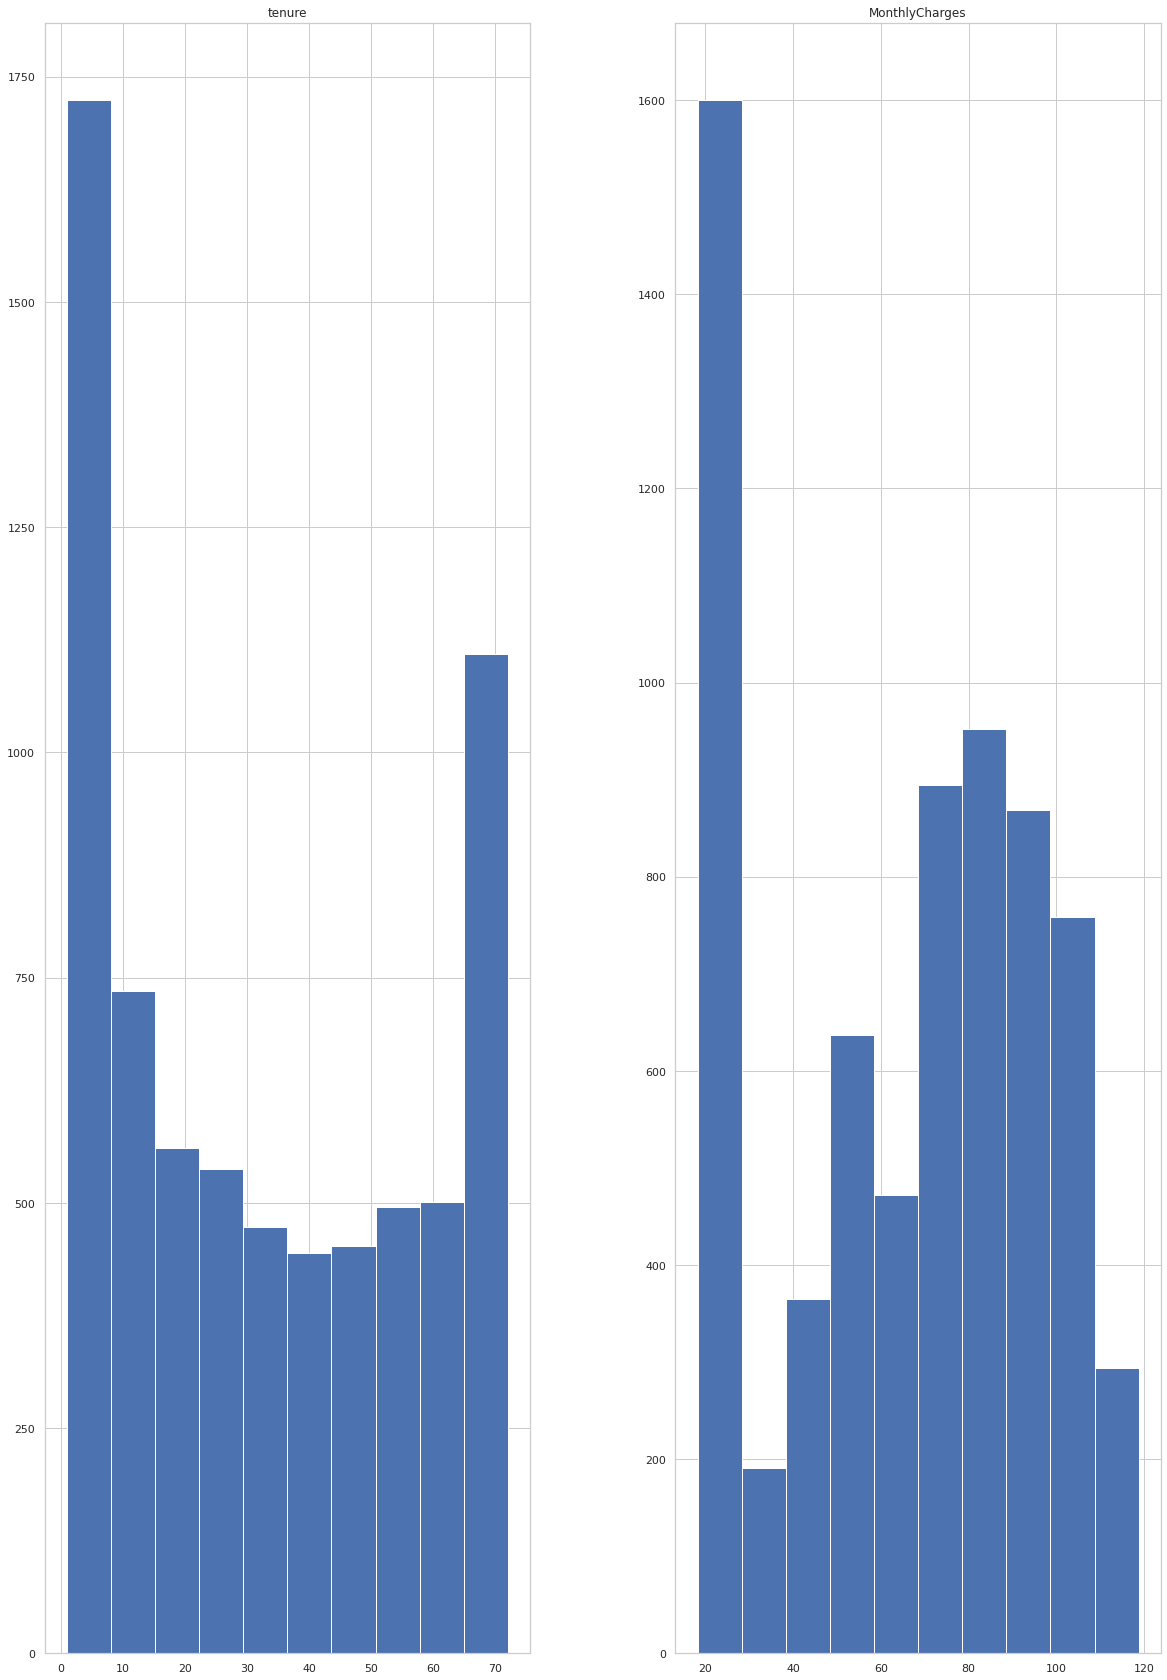

In [80]:
Continuous_Data.hist(figsize=(20,30))

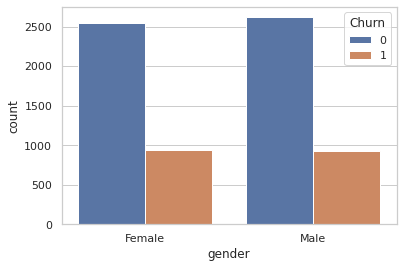

In [81]:
pd.crosstab(df_churn['Churn'], df_churn['gender'])
sns.countplot(x="gender", hue = "Churn", data = df_churn)

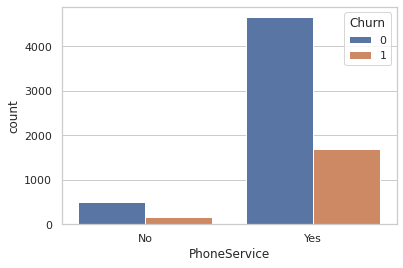

In [82]:
pd.crosstab(df_churn['Churn'], df_churn['PhoneService'])
sns.countplot(x="PhoneService", hue = "Churn", data = df_churn)

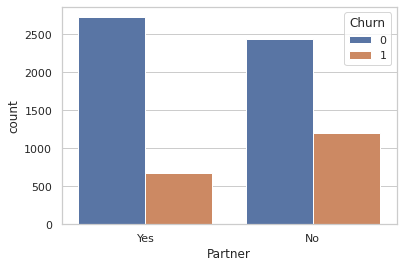

In [84]:
pd.crosstab(df_churn['Churn'], df_churn['Partner'])
sns.countplot(x="Partner", hue = "Churn", data = df_churn)

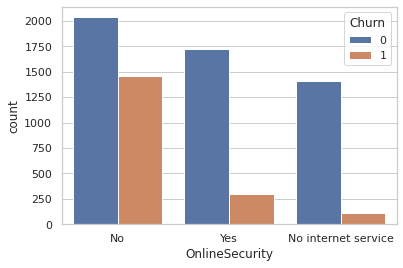

In [85]:
pd.crosstab(df_churn['Churn'], df_churn['OnlineSecurity'])
sns.countplot(x="OnlineSecurity", hue = "Churn", data = df_churn)

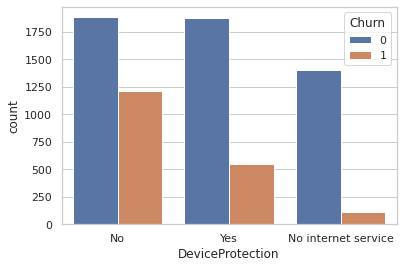

In [86]:
pd.crosstab(df_churn['Churn'], df_churn['DeviceProtection'])
sns.countplot(x="DeviceProtection", hue = "Churn", data = df_churn)

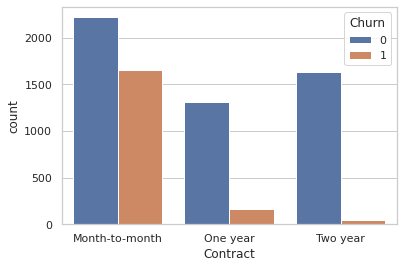

In [87]:
pd.crosstab(df_churn['Churn'], df_churn['Contract'])
sns.countplot(x="Contract", hue = "Churn", data = df_churn)

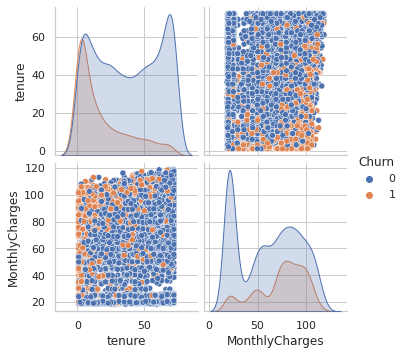

In [91]:
sns.pairplot(df_churn,hue="Churn")

In [ ]:

from sklearn.model_selection import train_test_split
SEED =45
target = 'Churn'
X_train, X_test, ser_ytrain, ser_ytest = train_test_split(
    df_churn.drop(target,axis=1), df_churn[target],
    test_size=0.2, random_state=SEED, stratify=df_churn[target])

y_train = ser_ytrain.to_numpy().ravel()
y_test = ser_ytest.to_numpy().ravel()

features_train = X_train.columns.to_list()
features_train

In [102]:
model_df = pd.get_dummies(df_churn.loc[:, df_churn.columns!=target])
model_df


,tenure,MonthlyCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
Categorical_Data_Columns = ['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod','Churn']
Categorical_Data = pd.DataFrame(df_churn[Categorical_Data_Columns])
for column in Categorical_Data.columns:
    Categorical_Data[column].fillna(Categorical_Data[column].mode()[0], inplace=True)
Categorical_Data
Categorical_Data.isnull().values.any()

In [103]:
model_df.columns

Index(['tenure', 'MonthlyCharges', 'gender_Female', 'gender_Male',
       'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two 

In [104]:
features = ['tenure', 'MonthlyCharges', 'gender_Female', 'gender_Male',
       'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
target = "Churn"

In [116]:
! pip install alibi 

     |████████████████████████████████| 235kB 8.5MB/s 
     |████████████████████████████████| 358kB 11.6MB/s 
     |████████████████████████████████| 28.0MB 157kB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489400 sha256=1b2a95ef0fe8f254d22fc3b15379e288595ced5358142ed343ccf65b61ea348a
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.1.0-py2.py3-none-any.whl size=28052145 sha256=f01a5e72946bdcaeb2a9338854f75da99850802af2d57e676a7d29b12a3a951d
  Stored in directory: /root/.cache/pip/wheels/2a/2b/0a/d6fb6235c56d014d224bca760d15d7cbdd820813085ffcd35d
Successfully built shap spacy-lookups-data


In [118]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree

import graphviz
import pandas as pd
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees
from sklearn import tree
random_state = 1234
tree_classifier = DecisionTreeClassifier(max_depth=4, random_state=random_state)
tree_classifier.fit(model_df[features], df_churn[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [120]:
sk_dtree = ShadowSKDTree(tree_classifier, model_df[features], df_churn[target], features, target, [0, 1])

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


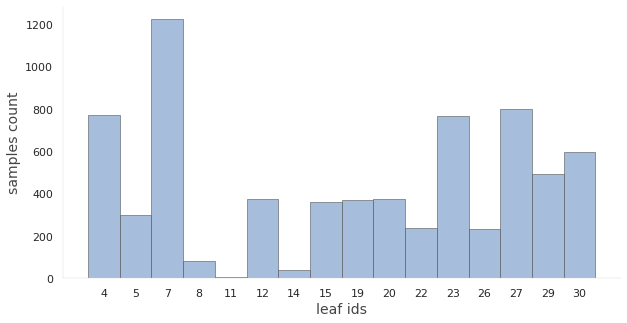

In [121]:
trees.viz_leaf_samples(tree_classifier, model_df[features], features)

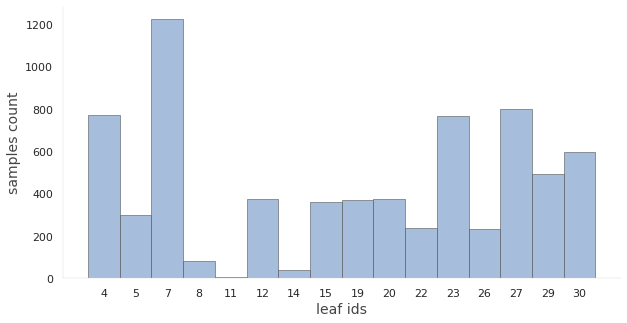

In [122]:
trees.viz_leaf_samples(sk_dtree)

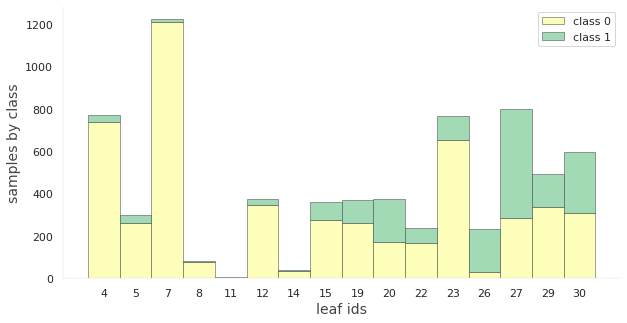

In [123]:
trees.ctreeviz_leaf_samples(tree_classifier, model_df[features], df_churn[target], features)

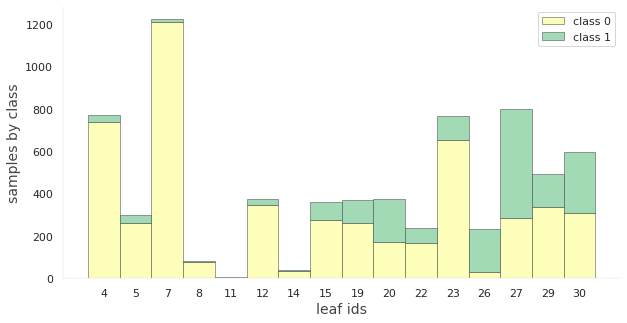

In [124]:
trees.ctreeviz_leaf_samples(sk_dtree)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



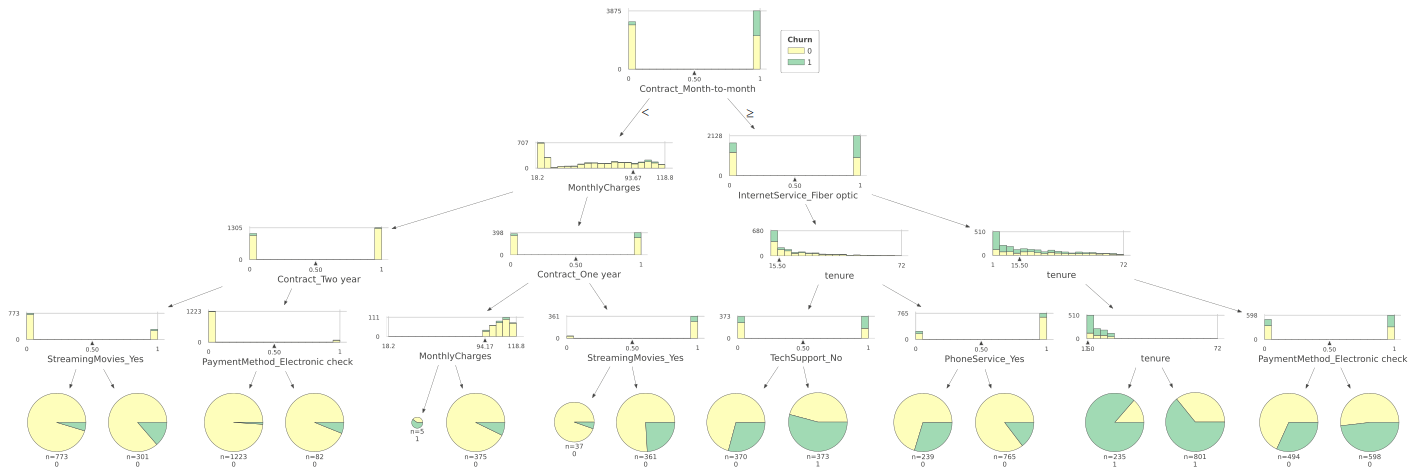

In [139]:
trees.dtreeviz(tree_classifier, model_df[features], df_churn[target], features, target, class_names=[0, 1])

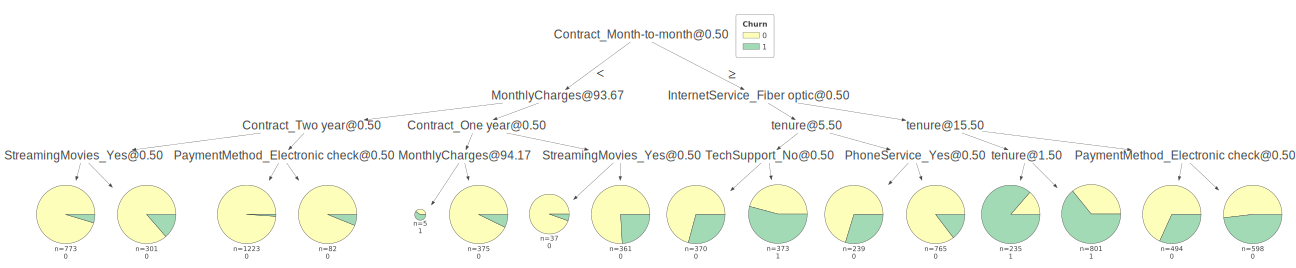

In [126]:
trees.dtreeviz(sk_dtree, fancy=False)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



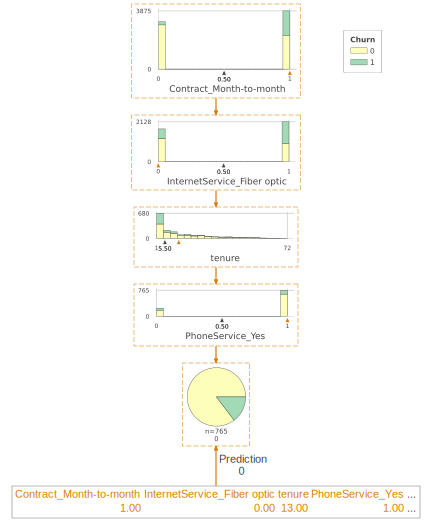

In [127]:
trees.dtreeviz(sk_dtree, show_just_path=True, X = model_df[features].iloc[10])

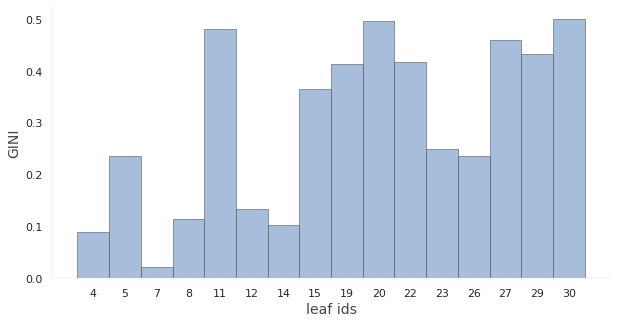

In [128]:
trees.viz_leaf_criterion(tree_classifier)

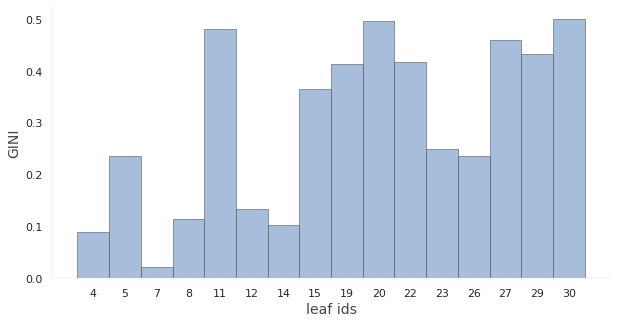

In [129]:
trees.viz_leaf_criterion(sk_dtree)

In [130]:
trees.describe_node_sample(tree_classifier, node_id=10, x_data=model_df[features], feature_names=features)

,tenure,MonthlyCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.0,380.0,380.000000,380.0,380.000000,380.000000,380.000000,380.0,380.000000,380.0,380.000000,380.000000,380.0,380.000000,380.000000,380.0,380.000000,380.000000,380.0,380.000000,380.000000,380.0,380.000000,380.000000,380.0,380.000000,380.0,380.0,380.0,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,65.378947,107.041053,0.500000,0.500000,0.839474,0.160526,0.265789,0.734211,0.636842,0.363158,0.0,1.0,0.163158,0.0,0.836842,0.002632,0.997368,0.0,0.360526,0.0,0.639474,0.242105,0.0,0.757895,0.160526,0.0,0.839474,0.250000,0.0,0.750000,0.097368,0.0,0.902632,0.094737,0.0,0.905263,0.0,0.0,1.0,0.284211,0.715789,0.376316,0.347368,0.226316,0.050000
std,9.767945,6.495673,0.500659,0.500659,0.367577,0.367577,0.442335,0.442335,0.481544,0.481544,0.0,0.0,0.369997,0.0,0.369997,0.051299,0.051299,0.0,0.480786,0.0,0.480786,0.428922,0.0,0.428922,0.367577,0.0,0.367577,0.433584,0.0,0.433584,0.296850,0.0,0.296850,0.293237,0.0,0.293237,0.0,0.0,0.0,0.451632,0.451632,0.485099,0.476762,0.418998,0.218232
min,24.000000,93.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,101.900000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,1.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0,0.750000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,108.175000,0.500000,0.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,1.0,0.000000,0.0,1.000000,0.000000,1.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,111.950000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.250000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.0,0.0,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:

trees.describe_node_sample(sk_dtree, node_id=10)

,tenure,MonthlyCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.0,380.0,380.000000,380.0,380.000000,380.000000,380.000000,380.0,380.000000,380.0,380.000000,380.000000,380.0,380.000000,380.000000,380.0,380.000000,380.000000,380.0,380.000000,380.000000,380.0,380.000000,380.000000,380.0,380.000000,380.0,380.0,380.0,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,65.378947,107.041053,0.500000,0.500000,0.839474,0.160526,0.265789,0.734211,0.636842,0.363158,0.0,1.0,0.163158,0.0,0.836842,0.002632,0.997368,0.0,0.360526,0.0,0.639474,0.242105,0.0,0.757895,0.160526,0.0,0.839474,0.250000,0.0,0.750000,0.097368,0.0,0.902632,0.094737,0.0,0.905263,0.0,0.0,1.0,0.284211,0.715789,0.376316,0.347368,0.226316,0.050000
std,9.767945,6.495673,0.500659,0.500659,0.367577,0.367577,0.442335,0.442335,0.481544,0.481544,0.0,0.0,0.369997,0.0,0.369997,0.051299,0.051299,0.0,0.480786,0.0,0.480786,0.428922,0.0,0.428922,0.367577,0.0,0.367577,0.433584,0.0,0.433584,0.296850,0.0,0.296850,0.293237,0.0,0.293237,0.0,0.0,0.0,0.451632,0.451632,0.485099,0.476762,0.418998,0.218232
min,24.000000,93.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,101.900000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,1.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0,0.750000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,108.175000,0.500000,0.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,1.0,0.000000,0.0,1.000000,0.000000,1.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,111.950000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,0.000000,0.0,1.000000,0.000000,1.000000,0.0,1.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.250000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.0,0.0,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
X = model_df[features].iloc[10]
X

tenure                                     13.00
MonthlyCharges                             49.95
gender_Female                               0.00
gender_Male                                 1.00
SeniorCitizen_No                            1.00
SeniorCitizen_Yes                           0.00
Partner_No                                  0.00
Partner_Yes                                 1.00
Dependents_No                               0.00
Dependents_Yes                              1.00
PhoneService_No                             0.00
PhoneService_Yes                            1.00
MultipleLines_No                            1.00
MultipleLines_No phone service              0.00
MultipleLines_Yes                           0.00
InternetService_DSL                         1.00
InternetService_Fiber optic                 0.00
InternetService_No                          0.00
OnlineSecurity_No                           0.00
OnlineSecurity_No internet service          0.00
OnlineSecurity_Yes  

In [133]:
print(trees.explain_prediction_path(tree_classifier, X, feature_names=features, explanation_type="plain_english"))

5.5 <= tenure 
0.5 <= PhoneService_Yes 
InternetService_Fiber optic < 0.5
0.5 <= Contract_Month-to-month 

